In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm

In [2]:
import sys
sys.path.append('../')
sys.path.append('../../')

In [3]:
import torch_AMCDataset
from importlib import reload  

reload(torch_AMCDataset)

<module 'torch_AMCDataset' from '../torch_AMCDataset.py'>

In [5]:
root_dir = '/export/scratch2/bvdp/Data/Projects_DICOM_data/ThreeD/MODIR_data_train_split_preprocessed_21-08-2020/'
meta_path = '/export/scratch3/bvdp/segmentation/OAR_segmentation/data_preparation/meta/dataset_train_21-08-2020_slice_annot.csv'

In [7]:
train_dataset = torch_AMCDataset.AMCDataset(root_dir, meta_path, transform=None, is_training=True)

In [58]:
from collections import Counter

counter = Counter()
for vol, mask in train_dataset:
    print(vol.shape, mask.shape)
    counts = dict(zip(*np.unique(mask, return_counts=True)))
    counter.update(counts)
counter

(1, 133, 200, 200) (133, 200, 200)
(1, 201, 200, 200) (201, 200, 200)
(1, 196, 200, 200) (196, 200, 200)
(1, 179, 240, 240) (179, 240, 240)
(1, 139, 260, 260) (139, 260, 260)
(1, 159, 200, 200) (159, 200, 200)
(1, 136, 200, 200) (136, 200, 200)
(1, 155, 200, 200) (155, 200, 200)
(1, 165, 200, 200) (165, 200, 200)
(1, 155, 200, 200) (155, 200, 200)
(1, 157, 260, 260) (157, 260, 260)
(1, 194, 260, 260) (194, 260, 260)
(1, 194, 260, 260) (194, 260, 260)
(1, 152, 200, 200) (152, 200, 200)
(1, 160, 200, 200) (160, 200, 200)
(1, 171, 260, 260) (171, 260, 260)
(1, 162, 200, 200) (162, 200, 200)
(1, 151, 200, 200) (151, 200, 200)
(1, 208, 260, 260) (208, 260, 260)
(1, 158, 260, 260) (158, 260, 260)
(1, 143, 260, 260) (143, 260, 260)
(1, 134, 200, 200) (134, 200, 200)
(1, 153, 200, 200) (153, 200, 200)
(1, 165, 200, 200) (165, 200, 200)
(1, 154, 200, 200) (154, 200, 200)
(1, 137, 200, 200) (137, 200, 200)
(1, 195, 200, 200) (195, 200, 200)
(1, 172, 240, 240) (172, 240, 240)
(1, 172, 240, 240) (

Counter({0: 824948295, 1: 15136142, 2: 2062197, 3: 582369, 4: 631797})

In [97]:
counter

Counter({0: 824948295, 1: 15136142, 2: 2062197, 3: 582369, 4: 631797})

<BarContainer object of 5 artists>

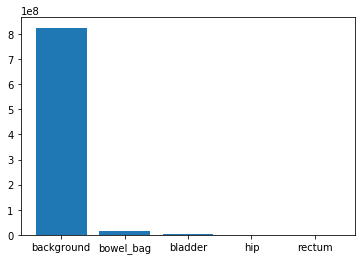

In [98]:
classes = ['background', 'bowel_bag', 'bladder', 'hip', 'rectum']
x = np.array([counter[k] for k in sorted(counter.keys())])
plt.bar(classes, x)

In [105]:
json.dumps([1,2,3,4], separators=(',', ':'))

'[1,2,3,4]'

0.52,0.85,1.09,1.28,1.26
0.25,0.67,1.10,1.51,1.48
0.05,0.36,0.98,1.84,1.77


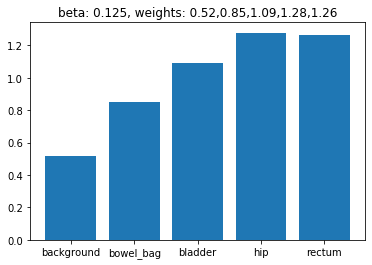

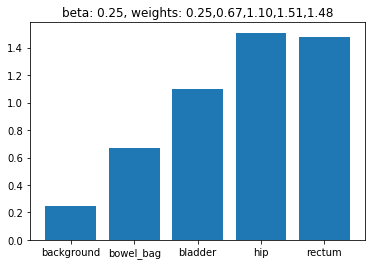

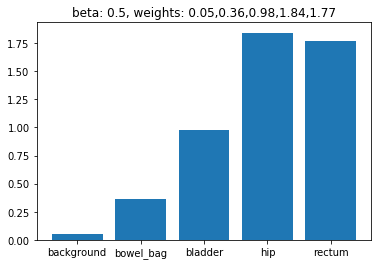

In [102]:

def generate_inverse_weights(x, beta):    
    x_inv = 1/x
    x_transformed = x_inv**beta/ (x_inv**beta).sum()    
    return x_transformed
    
# beta = 0.125 # 0.5, 0.25, 0.125
for beta in [0.125, 0.25, 0.5]:
    # multiplied 5 to keep the total amount of loss the same as without weights to avoid having to
    # correct for this in the learning rate for fair comparison
    x_trans = generate_inverse_weights(x, beta) * 5 
    plt.figure()
    plt.bar(classes, x_trans)
    weights = ",".join([f'{x:.2f}' for x in x_trans])
    plt.title(f'beta: {beta}, weights: {weights}')
    print(",".join([f'{x:.2f}' for x in x_trans]))